In [29]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0) #每次生成的随即数都相同
import seaborn.linearmodels as snsl

In [30]:
from sklearn import learning_curve

#定义一个画学习曲线的函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    产生一个简单的测试和训练的学习曲线
    参数
    ----------
    estimator : "fit" 和 "predict" 方法

    title : string  标题
       

    X : array-like, shape (n_samples, n_features)
        训练变量, n_samples样本数量 n_features 样本特征数量.

    y : array-like, shape (n_samples) or (n_samples, n_features), 与x相对应的
        分类和回归变量；如果没有，就是非监督学习.

    ylim : tuple, shape (ymin, ymax), optional
        定义y的取值范围

    cv : integer, 交叉验证生成器, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
        （默认为3）。可以传递具体的交叉验证对象，使用sklearn.cross_validation模块
        用于列出可能的对象参数对。
    """
    
    plt.figure()#创建一个新的图
    
    #learning_curve方法返回训练集大小（比例），训练评分，测试评分
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)  #训练数据的均值
    train_scores_std = np.std(train_scores, axis=1)    #训练数据的标准差
    test_scores_mean = np.mean(test_scores, axis=1)    #测试数据的均值
    test_scores_std = np.std(test_scores, axis=1)      #测试数据的标准差
    
    #fill_between方法：画两个函数的交叉区域，（自变量，函数1，函数2）
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    #集合大小与训练数据得分的均值散点图
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    #集合大小与测试数据得分的均值散点图
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") #开启网格
    
    if ylim:
        plt.ylim(ylim) #规定y轴的范围
    plt.title(title)

## 一、编一些玩具数据

In [31]:
# 我们使用sklearn.datasets的make_classification函数来生成一些简单的玩具数据：
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=20, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)
# 注意到我们为二分类生成了一个数据集，这个数据集包括1000个数据点，每个特征20维，
#n_informative应该是强关联的特征，冗余特征2个，分成两类标签，随机种子random_state=0（用于再现）


# 将特征和标签封装到一个同一个的df中。
from pandas import DataFrame
df = DataFrame(np.hstack((X, y[:, None])), columns = list(range(20)) + ["class"])
#hstack：需要有一个轴相等，另一个轴才能相加

# 我们来看一看前5个数据点：
df[:5]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0.0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1.0
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1.0
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1.0
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0.0


## 二、可视化

    Seaborn是一个不错的统计数据可视化包。我们使用它的一些函数来探索数据。

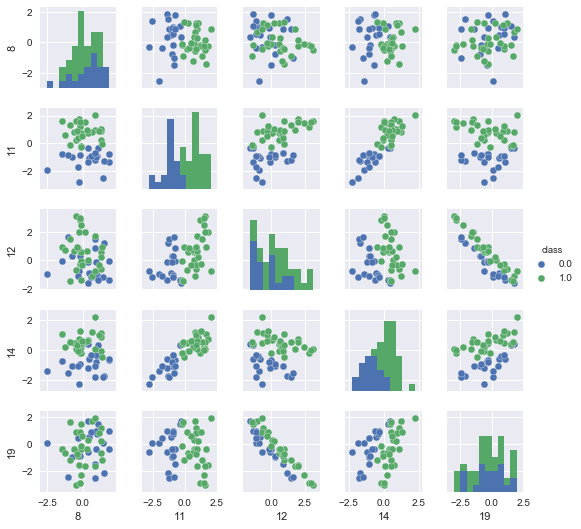

In [32]:
# 第一步是使用pairplot直观地生成散点图和直方图。
_ = sns.pairplot(df[:50], vars=[8, 11, 12, 14, 19], hue="class", size=1.5)
#这五个特征两两组合，画图
# 两种颜色对应了两个类别，我们使用了特征的一个子集、仅仅使用前50个数据点来简化问题。

# '''基于该直方图，我们可以看到一些特征比其他特征对分类更有用。
#     特别地，特征11和14看起来有丰富的信息量。
#     这两个特征的散点图显示类别在二维空间中几乎是线性可分的。
#     要更加注意的是，特征12和19是高度负相关的。


d:\Users\PC\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
d:\Users\PC\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


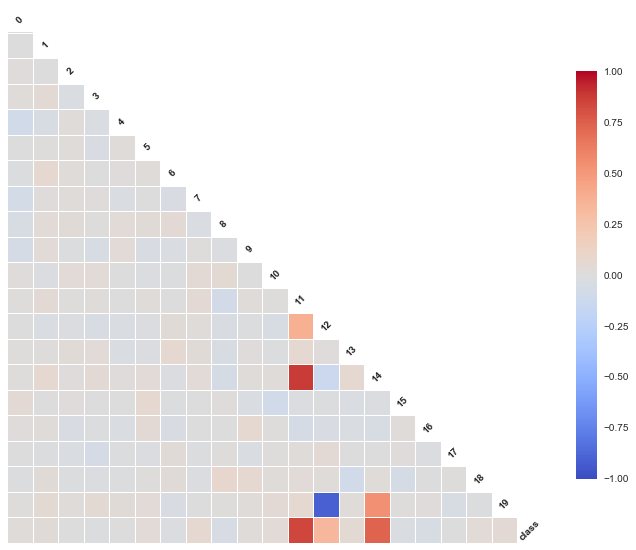

In [33]:
#     其实上面的那个图没啥必要，接下去，我们可以通过使用corrplot更系统地探索相关性：
#     这个很有用
plt.figure(figsize=(12, 10))
_ = snsl.corrplot(df, annot=False)

我们可以发现我们之前的观察结果在这里得到了确认：

    特征11和14与类强相关（他们有丰富的信息量）。
    更进一步，特征12和特征19强负相关，特征19和特征14强相关。
    因此，有一些特征是冗余的。这对于有些分类器可能会出现问题，比如，朴素贝叶斯，它假设所有的特征都是独立的。剩下的特征大部分都是噪声，他们既不相互关联，也不和类别相关。

## 三、方法的选择

http://scikit-learn.org/stable/tutorial/machine_learning_map/

我们有了1000个样本，要预测一个类别，并且有了标签，那么备忘单推荐我们首先使用LinearSVC（LinearSVC代表线性核的支持向量分类，并且对于这类特殊问题使用一个有效的算法）。所有我们做了个试验。LinearSVC需要选择正则化；我们使用标准L2范数惩罚和C=10.我们分别画出训练分数和验证分数的学习曲线（这个例子中分数代表准确率）：

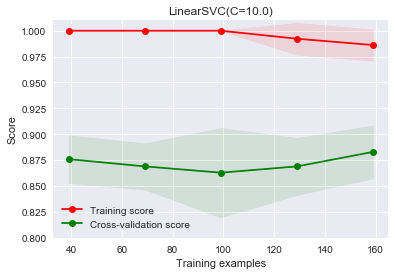

In [34]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve
#调用plot_learning_curve  画出学习曲线
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",X, y, ylim=(0.8, 1.01),train_sizes=np.linspace(.05, 0.2, 5))

    我们可以注意到训练数据和交叉验证数据的错误率有很大的差距。
    这意味什么？我们可能过度拟合训练数据了

## 四、解决过拟合

    有很多方法来减少过拟合：
### (1)增加训练样本数

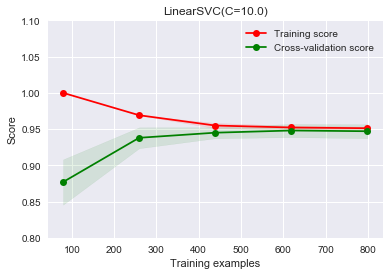

In [35]:
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.1),
                    train_sizes=np.linspace(.1, 1.0, 5))
#这里的train_sizes的比例变大了

    可以看到当训练数据增加时，验证分数越来越大，差距越来越小；因此现在不再过拟合了。
    有很多获得更多数据的方法:
    （a）可以尽力收集更多数据，
    （b）基于现有数据创造一些人为的数据（比如图像旋转，平移，扭曲），
    （c）加入人工噪声。
    如果以上的这些方法都不可行，就不可能获得更多的数据，我们或者可以减少特征的维数

### (2)减少特征的维数 

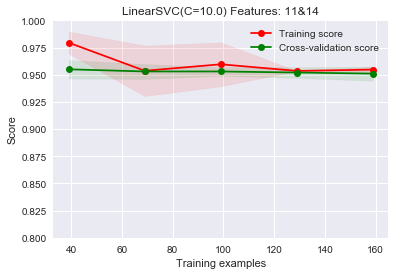

In [36]:
#从我们可视化中可以知道，特征11和14是信息量最大的，人工选择这两个特征

plot_learning_curve(LinearSVC(C=10.0),
                    "LinearSVC(C=10.0) Features: 11&14",
                    X[:, [11, 14]], y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

注意到，因为我们是手动的挑选特征，而且在比我们给分类器更多的数据上，这有一点作弊的意味。我们可以使用自动挑选特征：

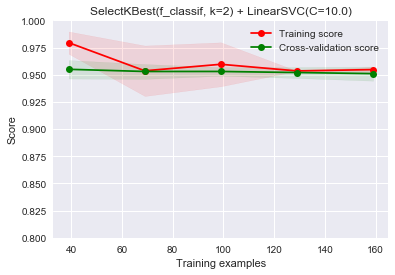

In [37]:
#自动挑选有价值的特征
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# 据每个特征的Anova F-value来挑选最佳的特征，这里选择两个

# 这里的估计器是一个pipeline，封装了特征提取、LinearSVC
plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=2)), # 自动挑选两个特征
                               ("svc", LinearSVC(C=10.0))]),
                    "SelectKBest(f_classif, k=2) + LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

    这样做效果非常好。在这个toy数据集上，特征选择是简单的。
    应该注意到特征选择只是减少模型复杂度的一个特殊方法。
    
    其他的减少模型复杂度的方法是：
    （a）减少线性回归多项式模型的次数，
    （b）减少人工神经网络节点的个数/层数，
    （c）增加RBF核的带宽等等。

    仍然有一个问题：为什么分类器不能自动的识别有用的特征？
    首先让我们转向另一种方法（增加分类器的正则化），来减少过拟合：

### (3)增加分类器的正则化 （减少线性SVC的C的系数）

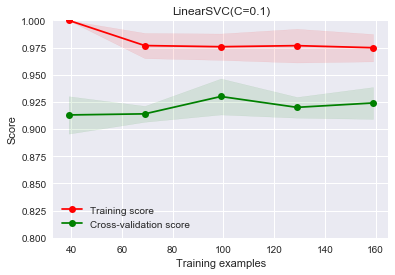

In [38]:
plot_learning_curve(LinearSVC(C=0.1),   #C=0.1  设置系数，让系数变小
                    "LinearSVC(C=0.1)",
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

In [91]:
 b = np.array((1,2))
np.hstack((a,b))

array([1, 2, 3, 1, 2])

    这已经有一点点作用了。
    我们也可以使用基于交叉验证的网格搜索自动地挑选分类器的正则化：

Chosen parameter on 100 datapoints: {'C': 0.01}


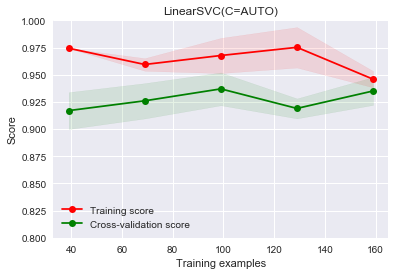

In [39]:
from sklearn.grid_search import GridSearchCV
est = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]}) #备选的系数

plot_learning_curve(est, "LinearSVC(C=AUTO)",   #C=AUTO，在这些备选系数中，自动挑选最合适的系数
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))
print ("Chosen parameter on 100 datapoints: %s"
       % est.fit(X[:100], y[:100]).best_params_)

    （2）和（3）进行对比，一般说来，（2）减少特征的维数的效果似乎更好。
    
    回想一下，LinearSVC还支持L1范数惩罚，这将减少特征的维数（有些特征的系数为0）。
    L1范数惩罚其实就是对应一个隐式的特征选择。让我们来试试这个：

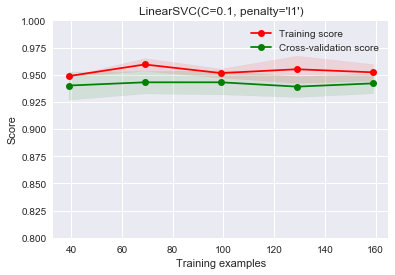

In [40]:
plot_learning_curve(LinearSVC(C=0.1, penalty='l1', dual=False), #L1范数
                    "LinearSVC(C=0.1, penalty='l1')", X, y, 
                    ylim=(0.8, 1.0),train_sizes=np.linspace(.05, 0.2, 5))

这看起来也很好。让我们来探讨学到的系数：

In [57]:
est = LinearSVC(C=0.1, penalty='l1', dual=False) # 初始化一个LinearSVC模型，使用L1正则
est.fit(X[:150], y[:150])  # 在150组数据上训练
print ("Coefficients learned: %s" % est.coef_)  #得到的系数
print ("Non-zero coefficients: %s" % np.nonzero(est.coef_)[1])

Coefficients learned: [[ 0.          0.          0.          0.          0.          0.01858009
   0.          0.          0.          0.00413505  0.          1.05241637
   0.0197127   0.          0.          0.          0.         -0.05665468
   0.14106729  0.        ]]
Non-zero coefficients: [ 5  9 11 12 17 18]


大部分系数是0（对应的特征被忽略），并且目前最大的权重在特征11上.

## 五、在其他数据集上使用LinearSVC

我们生成另外一个二分类的数据集，并且再次应用LinearSVC

In [78]:
from sklearn.datasets import make_circles
#在2d中制作一个包含较小圆的大圆,简单的玩具数据集，用于可视化聚类和分类算法。(简单的二维)
X, y = make_circles(n_samples=1000, random_state=2)

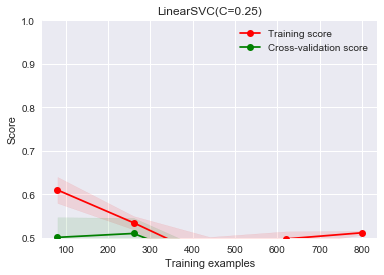

In [108]:
plot_learning_curve(LinearSVC(C=0.25), 
                    "LinearSVC(C=0.25)", 
                    X, y, ylim=(0.5, 1.0),
                    train_sizes=np.linspace(.1, 1.0, 5))

        训练误差都不如随机误差，难道上面的所有方法（更多数据，特征选择，增加正则化）都不奏效了吗？
    结果是：No。我们处在一个完全不同的情况：
    
    之前，训练分数一直接近完美，我们不得不解决过拟合。
    这次，训练误差非常低。这个可能的原因是什么？是欠拟合。

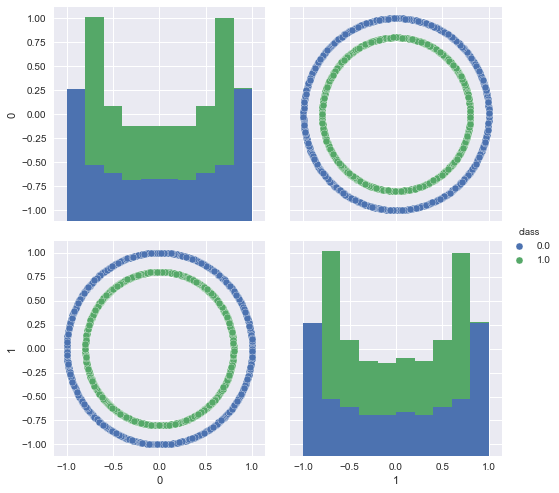

In [109]:
#查看数据集
df = DataFrame(np.hstack((X, y[:, None])),    #hstack：需要有一个轴相等，另一个轴才能相加
               columns = list(range(2)) + ["class"])  #定义列名

_ = sns.pairplot(df, vars=[0, 1], hue="class", size=3.5)

    这些数据显然不是线性可分的；更多的数据或者更少的特征没有用了。
    我们的模型错了；因此欠拟合。

## 六、解决欠拟合

### (1)使用更多或更好的特征（到原点的距离应该有用！）

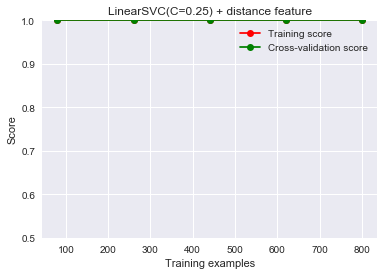

In [110]:
# 将距离原点的开方距离作为第三个特征
X_extra = np.hstack((X, X[:, [0]]**2 + X[:, [1]]**2))
plot_learning_curve(LinearSVC(C=0.25),
                    "LinearSVC(C=0.25) + distance feature",
                    X_extra, y, ylim=(0.5, 1.0),
                    train_sizes=np.linspace(.1, 1.0, 5))
#非常好！但是我们必须要花一些心思来想出这些特征。或许分类器可以自动的做到这些？

### （2）使用更复杂（合理的）的模型（减少正则化或非线性核）

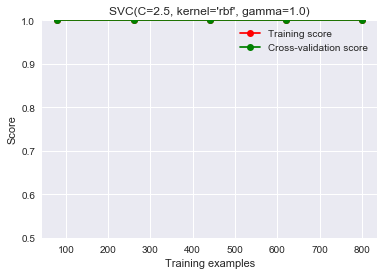

In [106]:
from sklearn.svm import SVC
# 注意：我们这里用的是初始的X，而不用其他额外的特征
plot_learning_curve(SVC(C=2.5, kernel="rbf", gamma=1.0),
                    "SVC(C=2.5, kernel='rbf', gamma=1.0)",
                    X, y, ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.1, 1.0, 5))
#是的，这也可以达到满意的效果！

## 七、面对更大的数据集和更高维的特征空间

    回到原始的数据集上，但是这次有更多的特征和样本，并且有5类。
    LinearSVC在这样大小的数据集上会有一点慢；
    
        备忘单上建议使用SGDClassifier。
        
    这个分类器学习到一个线性模型（就像LinearSVC或logistic回归），但是它在训练中使用随机梯度下降（就像反向传播的人工神经网络一样）。
    SGDClassifier允许小批量扫描数据，这对于数据量太大不能放到内存中时有帮助。
    交叉验证和这项技术不兼容（不能在SGDclassifier中使用交叉验证）；
    使用逐步验证代替：这里，估计器总是在训练数据集的下一块上进行测试（在用它进行训练之前）。
    训练之后，会再次进行测试来检查它适应数据的能力。

（1）选择合适的模型

In [111]:
#准备玩具数据
X, y = make_classification(200000, n_features=200, n_informative=25,
                           n_redundant=0, n_classes=10, class_sep=2,random_state=0)

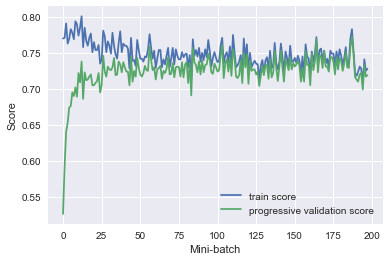

In [112]:
from sklearn.linear_model import SGDClassifier

#初始化一个SGDClassifier模型
est = SGDClassifier(penalty="l2", alpha=0.001)
progressive_validation_score = []
train_score = []

for datapoint in range(0, 199000, 1000):
    X_batch = X[datapoint:datapoint+1000]
    y_batch = y[datapoint:datapoint+1000]
    if datapoint > 0:
        progressive_validation_score.append(est.score(X_batch, y_batch))
    est.partial_fit(X_batch, y_batch, classes=range(10))
    if datapoint > 0:
        train_score.append(est.score(X_batch, y_batch))
        
plt.plot(train_score, label="train score")
plt.plot(progressive_validation_score, label="progressive validation score")
plt.xlabel("Mini-batch")
plt.ylabel("Score")
plt.legend(loc='best')

    这个图告诉我们，在50个mini-batches的数据之后，我们已经不能再提高验证数据了，因此可以停止训练了。由于训练分数不是很高，我们可能是欠拟合而不是过拟合。
    要是使用rbf核测试一下就更好了，但是SGDClassifier很不幸的不兼容核技巧。
    替代方法是可以使用一个多层的感知机，它也可以使用随机梯度下降进行训练，但是一个非线性模型，或者像备忘单建议的，使用核近似法。

（2）降维
#### 一个高维特征、大数据集的机器学习案例：经典的解决光学字符识别的问题

Dataset consist of 1083 samples with 64 features each


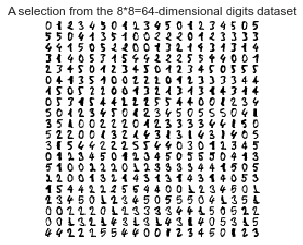

In [113]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print ("Dataset consist of %d samples with %d features each" % (n_samples, n_features))
 
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
_ = plt.title (('A selection from the 8*8=64-dimensional digits dataset'))


    由1083个样本组成的数据集，每个样本由64个特征组成
    因此我们有1083个手写数字（0，1，2，3，4，5）样本，每一个样本由8*8的4bit像素（0，16）灰度图片组成。
    因此特征的维数适中（64）；
    但是，这64维空间的可视化是非常重要的。
    我们来说明不同的减少维数（至二维）方法，
基于http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#example-manifold-plot-lle-digits-py

In [114]:
from matplotlib import offsetbox
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
 
    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})
 
    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

已经随机投影的二维数据的结果不是太差：

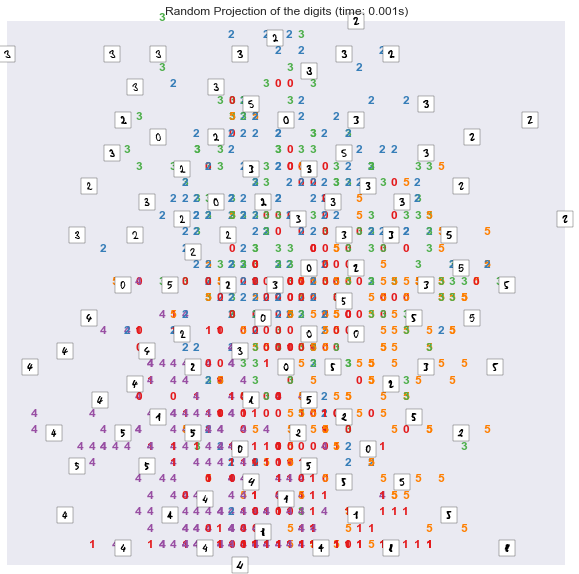

In [115]:
from sklearn import (manifold, decomposition, random_projection)

rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
stime = time.time()
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits (time: %.3fs)" % (time.time() - stime))

然而，有一个很著名的方法一般来说应该适合，也就是PCA（使用TruncatedSVD来实现，不需要构建协方差矩阵）：

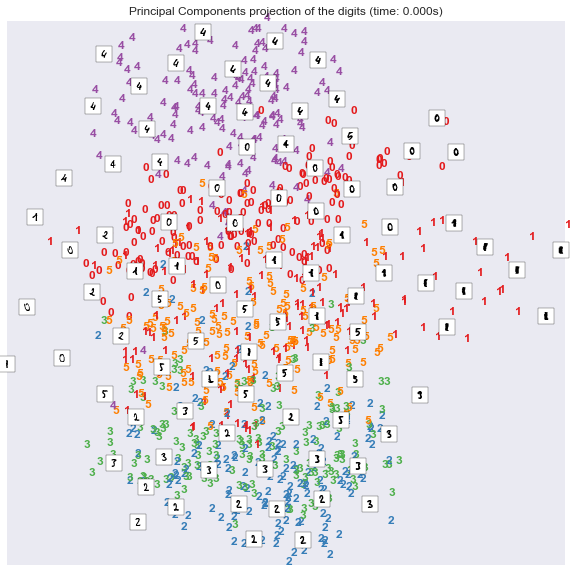

In [116]:
#PCA主成分分析降维
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
stime = time.time()
plot_embedding(X_pca,"Principal Components projection of the digits (time: %.3fs)" 
               % (time.time() - stime))

    PCA给出一个更好的结果，而且在这个数据集上甚至更快。
    另外，通过允许64维输入空间到二维目标空间的非线性变换，我们可以得到更好的结果。
    这有很多种方法；我们这里只介绍一种方法：t-SNE。

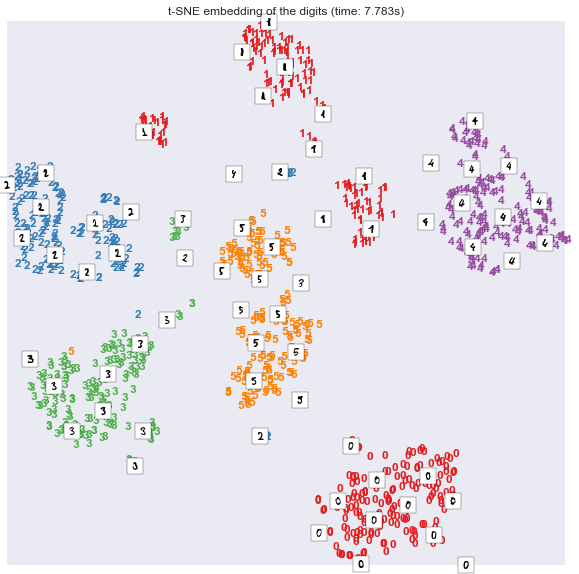

In [117]:
#t-SNE  非线性变换
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
stime = time.time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,"t-SNE embedding of the digits (time: %.3fs)" 
               % (time.time() - stime))

## 选择损失函数
损失函数的选择也非常重要。下面是不同损失函数的说明：
http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html

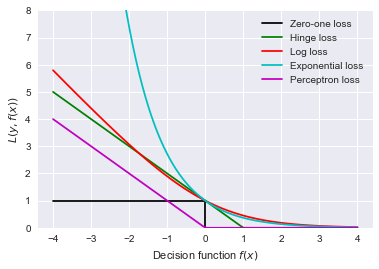

In [118]:
#五种损失函数
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-',
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-',
         label="Hinge loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',
         label="Log loss")
plt.plot(xx, np.exp(-xx), 'c-',
         label="Exponential loss")
plt.plot(xx, -np.minimum(xx, 0), 'm-',
         label="Perceptron loss")
# the balanced relative margin machine
#R = 2
#plt.plot(xx, np.where(xx < 1, 1 - xx, (np.where(xx > R, xx-R,0))), 'b-',
#         label="L1 Balanced Relative Margin Loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y, f(x))$")

不同的损失函数的优缺点：

    0-1损失（zero-one loss）是在分类问题中你实际上需要的。不幸地是，这是非凸优化问题，由于最优化问题会变得或多或少的不好解决，因此并不实用。

    合页损失（hinge loss,使用支持向量分类）导出一个在数据中稀疏的解（由于f(x)>1，它变为0），而且对离群点比较稳健（由于f(x)to−infty，它仅仅成线性增长）。它不提供充分的校准的概率。
    
    对数损失函数（log loss,比如，在逻辑回归中使用）导出很好的概率校准。因此，如果你不仅得到二值预测，还可以得出结果的概率，这个损失函数是一个很好的选择。缺点是，它的解在数据空间中是不稀疏的，它比合页损失函数更容易受到离群点的影响。
    
    指数损失函数（exp loss,在Adaboost中使用）非常容易受离群点的影响（由于当f(x)to−infty时它快速增加）。它主要适用于Adaboost中，因为它在一个简单有效的boosting算法中有效果。
    
    感知器损失函数(perception loss)基本上是合页损失函数的移动版本。合页损失函数也惩罚非常接近边界但是在正确一边的点（间隔最大化准则）。另一方面，感知器损失函数只要数据点在边界正确的一边就可以，如果数据是线性可分就使得边界待定，导致比间隔最大化更差的泛化性。

# END